##  Sentiment Analysis of Public Opinion on Clean Energy Transition using Twitter Data


#### Team Members : Jyothi Chamakuri, Rajendra Thammaneni

##### The goal of this project is to leverage sentiment analysis to understand public sentiment regarding the transition to clean energy. The raw data for this task consists of a multitude of tweets from Twitter, which are rich in textual content and express a wide range of sentiments about the shift towards renewable energy sources.

#### Input Data: The primary data for this project consists of tweets related to the transition towards clean energy. These tweets encapsulate individual viewpoints and experiences related to renewable energy sources and the shift towards them.

#### Our aim is to process this raw textual data and assign a sentiment label (positive, negative, or neutral) to each tweet. The end result of our model will be a sentiment label or score for each tweet. Through the analysis of these sentiment labels or scores, we aim to gain a deeper understanding of the public’s sentiment towards the transition to clean energy. This information could be invaluable for stakeholders such as policymakers, energy companies, and environmental activists. The main challenge lies in accurately interpreting the subtleties of human language and the emotions conveyed in the tweets.

#### Expected Outcomes: The expected outcome of this project is a sentiment label for each tweet. This involves classifying the sentiment as either positive, negative, or neutral. In addition, a sentiment score could be assigned to each tweet, providing a quantitative measure of the sentiment.

#### This project provides a comprehensive analysis of public sentiment towards clean energy transition, offering valuable insights for various stakeholders involved in the energy sector. The well-structured, clearly written, and comprehensive coverage of the key aspects of the project ensures a thorough understanding of the project’s objectives, challenges, and expected outcomes.


### 1. Import Libraries

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import nltk
from nltk.corpus import stopwords, words
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
import re
import string

### 2. Load and Explore Data

 Data Set: Clean energy transition tweets data set is sourced from Kaggle by using this link. https://www.kaggle.com/datasets/dsci511g1/cop26-energy-transition-tweets

In [44]:
tweets_df = pd.read_csv("/content/energy_transition_tweets_final.csv")

In [45]:
tweets_df.head()

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,coordinates,place
0,https://twitter.com/thomascheneygpc/status/146...,1461120800350621700,2021-11-17T23:55:19+00:00,@sjmuir Why I like local Renewable Natural Gas...,NaN,False,0,0,0,0,en,Twitter for iPhone,NaN,NaN
1,https://twitter.com/alexizawadzki/status/14611...,1461118744613187585,2021-11-17T23:47:09+00:00,Nevada is critical towards the clean energy tr...,Greater Vancouver,False,0,1,21,0,en,Twitter for iPhone,NaN,NaN
2,https://twitter.com/getiftech/status/146111665...,1461116656986599433,2021-11-17T23:38:51+00:00,COP26 Net Zero Commitments will Speed Energy T...,NaN,False,0,0,0,0,en,TekieBoard,NaN,NaN
3,https://twitter.com/KirkMMorrison/status/14611...,1461114703636140042,2021-11-17T23:31:06+00:00,@alanfryermedia You’re onto something! 🇨🇦 has ...,"Calgary, Alberta",False,0,1,5,0,en,Twitter for iPhone,NaN,NaN
4,https://twitter.com/ColumbiaUEnergy/status/146...,1461114427466346499,2021-11-17T23:30:00+00:00,"""The reality is that actions in this decade wi...","New York, New York",True,0,1,3,1,en,Twitter for Advertisers.,NaN,NaN


In [46]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16726 entries, 0 to 16725
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweetURL        16726 non-null  object 
 1   tweetID         16726 non-null  int64  
 2   date            16726 non-null  object 
 3   tweetContent    16726 non-null  object 
 4   userLocation    13295 non-null  object 
 5   isUserVerified  16726 non-null  bool   
 6   replyCount      16726 non-null  int64  
 7   retweetCount    16726 non-null  int64  
 8   likeCount       16726 non-null  int64  
 9   quoteCount      16726 non-null  int64  
 10  tweetLanguage   16726 non-null  object 
 11  sourceLabel     16726 non-null  object 
 12  coordinates     0 non-null      float64
 13  place           0 non-null      float64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 1.7+ MB


In [47]:
tweets_df.duplicated(subset= "tweetID").sum()

0

In [48]:
tweets_df.isnull().sum()

tweetURL              0
tweetID               0
date                  0
tweetContent          0
userLocation       3431
isUserVerified        0
replyCount            0
retweetCount          0
likeCount             0
quoteCount            0
tweetLanguage         0
sourceLabel           0
coordinates       16726
place             16726
dtype: int64

Our column of interent "tweetContent" doesnot contain any null values

### 3. Tweets Cleaning and Preprocessing

To reach the ultimate goal, there was a need to clean up the individual tweets. To make this easy, We created several functions in Python code which We further applied to the "tweetContent" column in  Pandas data frame to produce the desired results

In [49]:
# Function to remove punctuations, links, and stop words
def preprocessTweets(tweet):
    tweet = tweet.lower()  #has to be in place
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w in word_list]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them

In [50]:
import nltk
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [51]:
# stopwords
stop_words = list(stopwords.words('english'))
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + alphabets
word_list = words.words()

### An example of how the above function works is shown below

In [52]:
print(preprocessTweets("Future is going to be grim, if the countries dont act and transition to a clean enrgy future sooner rather than later"))

future going grim dont act transition clean future sooner rather later


In [53]:
# Apply preProcessTweets function to the 'tweetContent' column to generate a new column called 'Processed Tweets'.
tweets_df['Processed_Tweets'] = tweets_df['tweetContent'].apply(preprocessTweets)

In [54]:
tweets_df.head()

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,coordinates,place,Processed_Tweets
0,https://twitter.com/thomascheneygpc/status/146...,1461120800350621700,2021-11-17T23:55:19+00:00,@sjmuir Why I like local Renewable Natural Gas...,NaN,False,0,0,0,0,en,Twitter for iPhone,NaN,NaN,like local renewable natural gas hydrogen fair...
1,https://twitter.com/alexizawadzki/status/14611...,1461118744613187585,2021-11-17T23:47:09+00:00,Nevada is critical towards the clean energy tr...,Greater Vancouver,False,0,1,21,0,en,Twitter for iPhone,NaN,NaN,critical towards clean energy transition
2,https://twitter.com/getiftech/status/146111665...,1461116656986599433,2021-11-17T23:38:51+00:00,COP26 Net Zero Commitments will Speed Energy T...,NaN,False,0,0,0,0,en,TekieBoard,NaN,NaN,cop net zero speed energy transition increase ...
3,https://twitter.com/KirkMMorrison/status/14611...,1461114703636140042,2021-11-17T23:31:06+00:00,@alanfryermedia You’re onto something! 🇨🇦 has ...,"Calgary, Alberta",False,0,1,5,0,en,Twitter for iPhone,NaN,NaN,onto something low carbon energy mix specifica...
4,https://twitter.com/ColumbiaUEnergy/status/146...,1461114427466346499,2021-11-17T23:30:00+00:00,"""The reality is that actions in this decade wi...","New York, New York",True,0,1,3,1,en,Twitter for Advertisers.,NaN,NaN,reality decade decisive planet warming traject...


In [55]:
tweets_df['Processed_Tweets'].head(20)

0     like local renewable natural gas hydrogen fair...
1              critical towards clean energy transition
2     cop net zero speed energy transition increase ...
3     onto something low carbon energy mix specifica...
4     reality decade decisive planet warming traject...
5     plenary speaker talk scientific basis rapid cl...
6     respectful contentious debate thinking beyond ...
7                                                      
8     collaboration project innovation agency innova...
9     rewarding feeling part company world sustainab...
10    rewarding feeling part company world sustainab...
11    even coal like japan camouflage coal power mak...
12    way make time without profit work save us abso...
13    want problem call everyone poorly executed ene...
14       part brain thought protest internal combustion
15    dynamic longer supply covid ongoing energy tra...
16    listen cost transition away coal one coal town...
17    please join us th discussion distinguished

### 4. Data Exploration

In this section, the aim was to show the most common words used by Twitter Users in expressing sentiments towards clean energy transition. This was made possible by the "getAdjectives" function. We also made use of WordCloud and MatPlotlib for this task.

In [56]:
# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [57]:
# Apply getAdjectives function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Adjectives'
tweets_df['Tweets_Adjectives'] = tweets_df['Processed_Tweets'].apply(getAdjectives)

In [58]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_string = " ".join(tweets_string)

In [59]:
!pip install wordcloud

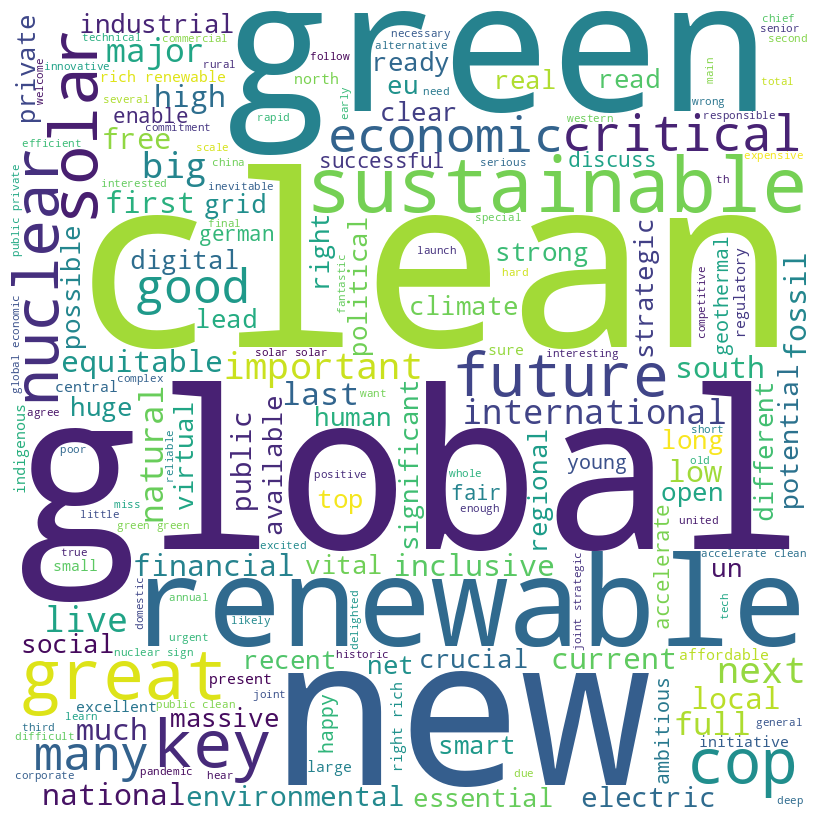

In [60]:
# Generate word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(tweets_string)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### 5. Analyzing Top Words in the Word Cloud

In [61]:
# Combine all words into a list
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [62]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)

In [63]:
df.head(10)  # Check dataframe first 10 rows

,Words,Count
5,clean,1509
8,global,1367
33,new,1226
66,green,1015
1,renewable,797
19,sustainable,544
48,solar,497
67,great,483
101,nuclear,483
163,key,417


#### Top 10 Words in Twitter Users Opinoins on Clean Energy Transition

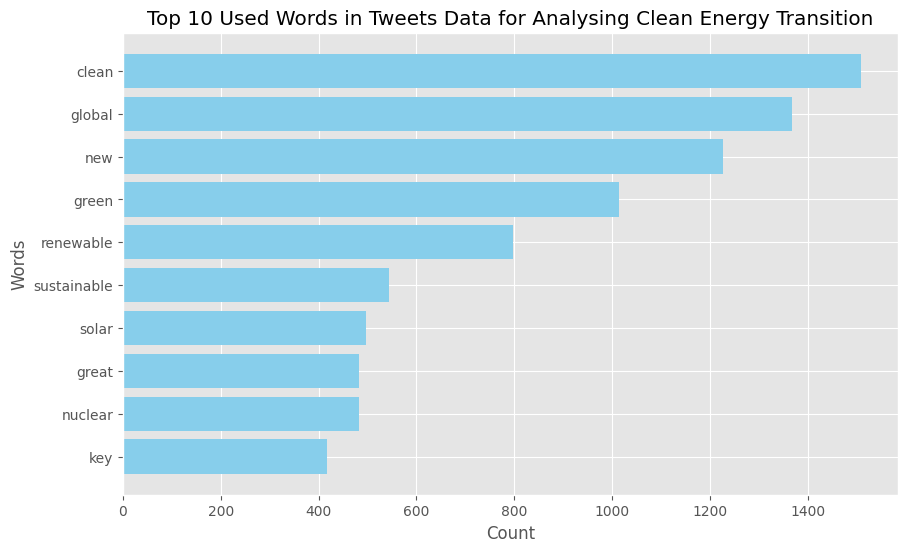

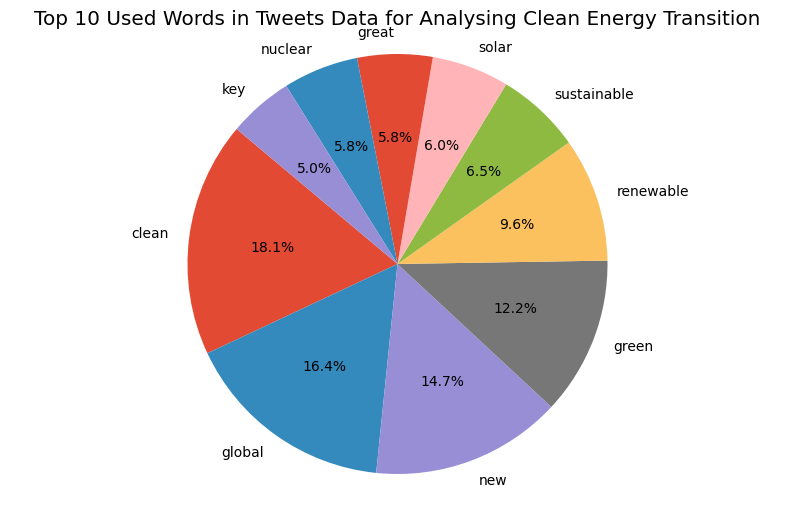

In [64]:
# Select top 10 words by count
df_top10 = df.nlargest(10, 'Count')

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_top10['Words'], df_top10['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Top 10 Used Words in Tweets Data for Analysing Clean Energy Transition')
plt.gca().invert_yaxis()
plt.show()

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie(df_top10['Count'], labels=df_top10['Words'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Used Words in Tweets Data for Analysing Clean Energy Transition')
plt.show()


## 6.Sentiment Analysis using enasemble of pre-trained models.

Since our goal to classify tweets and our data is unlabeled, we will use the ensemble of pretrained models which are trained on vast amount of social media data to classify the tweet sentiments and take the output from ensemble through hardvoting of each model for better classification eliminating any biases in one single model.

### 1.VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It's a pre-trained sentiment analysis model that provides a sentiment score for a given text.

## Key Features

- **Polarity and Intensity of Emotion**: VADER is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
- **Context Understanding**: VADER is intelligent enough to understand the basic context of these words, such as "did not love" as a negative statement.
- **Emphasis Understanding**: It also understands the emphasis of capitalization and punctuation, such as "ENJOY".
- **Lexicon Based**: VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores.
- **Easy to Use**: VADER is part of the Natural Language Toolkit (NLTK) library in Python, making it accessible and easy to use.

## Usage

VADER can be applied directly to unlabeled text data. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

In [65]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [66]:
# Calculate sentiment scores
tweets_df['sentiment_scores_vader'] = tweets_df['Processed_Tweets'].apply(lambda tweet: vader.polarity_scores(tweet))


In [67]:
# Assign sentiment labels based on compound score
tweets_df['sentiment_label_vader'] = tweets_df['sentiment_scores_vader'].apply(lambda score_dict: 'positive' if score_dict['compound'] > 0 else ('neutral' if score_dict['compound'] == 0 else 'negative'))

In [68]:
tweets_df.head()

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,coordinates,place,Processed_Tweets,Tweets_Adjectives,sentiment_scores_vader,sentiment_label_vader
0,https://twitter.com/thomascheneygpc/status/146...,1461120800350621700,2021-11-17T23:55:19+00:00,@sjmuir Why I like local Renewable Natural Gas...,NaN,False,0,0,0,0,en,Twitter for iPhone,NaN,NaN,like local renewable natural gas hydrogen fair...,local renewable natural fair,"{'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'comp...",positive
1,https://twitter.com/alexizawadzki/status/14611...,1461118744613187585,2021-11-17T23:47:09+00:00,Nevada is critical towards the clean energy tr...,Greater Vancouver,False,0,1,21,0,en,Twitter for iPhone,NaN,NaN,critical towards clean energy transition,critical clean,"{'neg': 0.253, 'neu': 0.22, 'pos': 0.527, 'com...",positive
2,https://twitter.com/getiftech/status/146111665...,1461116656986599433,2021-11-17T23:38:51+00:00,COP26 Net Zero Commitments will Speed Energy T...,NaN,False,0,0,0,0,en,TekieBoard,NaN,NaN,cop net zero speed energy transition increase ...,cop,"{'neg': 0.233, 'neu': 0.446, 'pos': 0.322, 'co...",positive
3,https://twitter.com/KirkMMorrison/status/14611...,1461114703636140042,2021-11-17T23:31:06+00:00,@alanfryermedia You’re onto something! 🇨🇦 has ...,"Calgary, Alberta",False,0,1,5,0,en,Twitter for iPhone,NaN,NaN,onto something low carbon energy mix specifica...,low global global economic big,"{'neg': 0.08, 'neu': 0.682, 'pos': 0.239, 'com...",positive
4,https://twitter.com/ColumbiaUEnergy/status/146...,1461114427466346499,2021-11-17T23:30:00+00:00,"""The reality is that actions in this decade wi...","New York, New York",True,0,1,3,1,en,Twitter for Advertisers.,NaN,NaN,reality decade decisive planet warming traject...,decisive trajectory,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",positive


In [69]:
# See quick results of the Sentiment Analysis
tweets_df['sentiment_label_vader'].value_counts()

sentiment_label_vader
positive    13644
neutral      1706
negative     1376
Name: count, dtype: int64

In [70]:
# Create dataframe for Count of Sentiment Categories
sent_df = tweets_df['sentiment_label_vader'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

In [71]:
sent_df # Display dataframe

,Sentiment,Total Tweets
0,positive,13644
1,neutral,1706
2,negative,1376


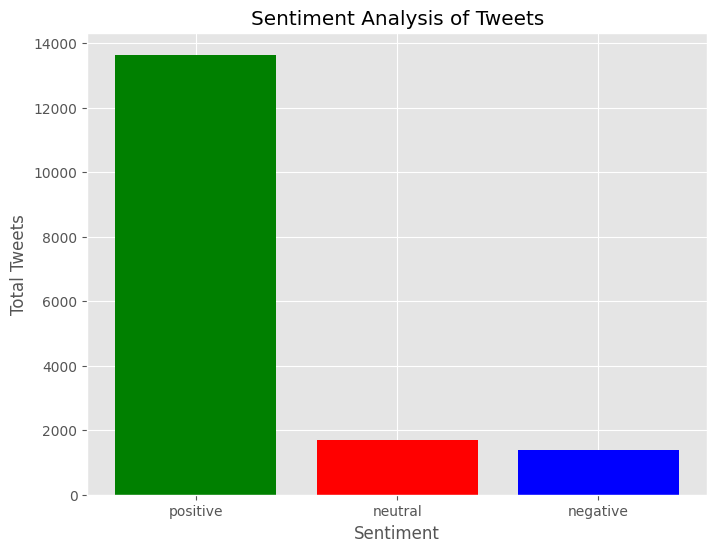

In [72]:
sentiments = sent_df['Sentiment']
total_tweets = sent_df['Total Tweets']

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiments, total_tweets, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Total Tweets')
plt.title('Sentiment Analysis of Tweets')
plt.show()

### 2.TextBlob

TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

TextBlob’s sentiment analysis module works by assigning polarity and subjectivity scores based on the text content. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment.

In [73]:
!pip install textblob

In [74]:
from textblob import TextBlob

# Function to calculate sentiment
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return the sentiment polarity
    return blob.sentiment.polarity

# Calculate sentiment scores
tweets_df['sentiment_scores_textblob'] = tweets_df['Processed_Tweets'].apply(get_sentiment)

# Assign sentiment labels based on score
tweets_df['sentiment_label_textblob'] = tweets_df['sentiment_scores_textblob'].apply(lambda score: 'positive' if score > 0 else ('neutral' if score == 0 else 'negative'))


In [75]:
sent_df_TB = tweets_df['sentiment_label_textblob'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

In [76]:
sent_df_TB

,Sentiment,Total Tweets
0,positive,8318
1,neutral,6364
2,negative,2044


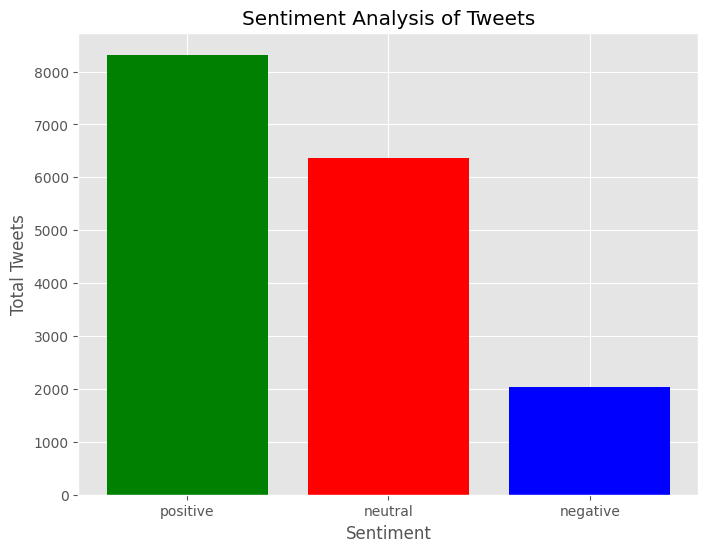

In [77]:
sentiments = sent_df_TB['Sentiment']
total_tweets = sent_df_TB['Total Tweets']

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiments, total_tweets, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Total Tweets')
plt.title('Sentiment Analysis of Tweets')
plt.show()

### 3.Pattern

Pattern has tools for data mining (Google, Twitter, and Wikipedia API, a web crawler, an HTML DOM parser), natural language processing (part-of-speech taggers, n-gram search, sentiment analysis, WordNet), machine learning (vector space model, clustering, SVM), and network analysis (graph centrality and visualization).

It includes a sentiment analysis module, pattern.en.sentiment, which allows you to determine the sentiment of a given text. This module includes the Sentiment class, which returns a sentiment polarity score between -1 (negative) and 1 (positive).

Depending upon the most commonly occurring positive (good, best, excellent, etc.) and negative (bad, awful, pathetic, etc.) adjectives, a sentiment score between 1 and -1 is assigned to the text.

In [78]:
!pip install pattern

In [79]:
from pattern.en import sentiment

# Calculate sentiment scores
tweets_df['sentiment_scores_pattern'] = tweets_df['Processed_Tweets'].apply(lambda tweet: sentiment(tweet))

# The sentiment function of pattern returns a (polarity, subjectivity) tuple
# Polarity is a value between -1.0 and 1.0 and subjectivity between 0.0 and 1.0 where 0.0 is very objective and 1.0 is very subjective.

# Assign sentiment labels based on polarity
tweets_df['sentiment_label_pattern'] = tweets_df['sentiment_scores_pattern'].apply(lambda score_tuple: 'positive' if score_tuple[0] > 0 else ('neutral' if score_tuple[0] == 0 else 'negative'))


In [80]:
sent_df_PN = tweets_df['sentiment_label_pattern'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

In [81]:
sent_df_PN

,Sentiment,Total Tweets
0,positive,8318
1,neutral,6364
2,negative,2044


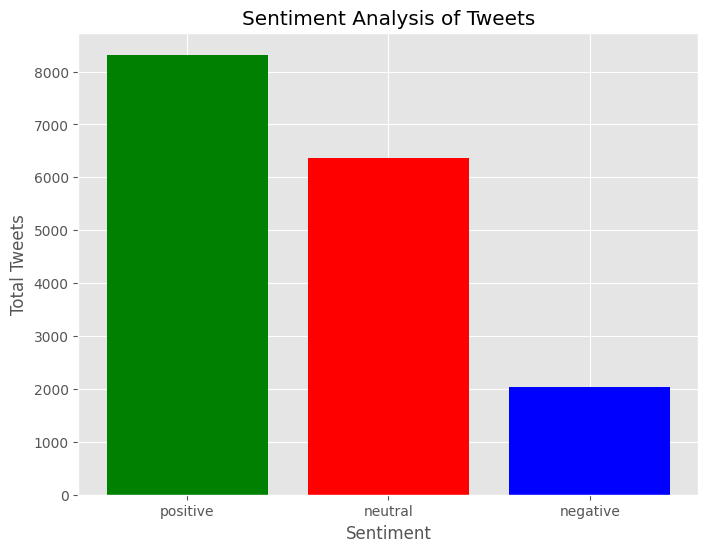

In [82]:
sentiments = sent_df_PN['Sentiment']
total_tweets = sent_df_PN['Total Tweets']

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiments, total_tweets, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Total Tweets')
plt.title('Sentiment Analysis of Tweets')
plt.show()

### 4. BERT Model for Sentiment Analysis

A BERT model "distilbert-base-uncased-finetuned-sst-2-english" is a model developed by Hugging Face. Here’s a summary of the model:

Model Type: It’s a fine-tuned version of the DistilBERT-base-uncased model.
Training: The model has been fine-tuned on the Stanford Sentiment Treebank (SST-2) dataset.
Performance: This model achieves an accuracy of 91.3% on the dev set1. For comparison, the Bert bert-base-uncased version reaches an accuracy of 92.7%.

Usage: It’s primarily used for sentiment analysis, a type of text classification.The model is designed to work with English text.

In [83]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Load the pre-trained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Function to calculate sentiment score
def get_sentiment_score(text):
    # Tokenize the text
    inputs = tokenizer.encode_plus(text, return_tensors='pt')
    # Get model outputs
    outputs = model(**inputs)
    # Get the probabilities by applying the softmax function
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    # Get the sentiment score
    sentiment_score = probs[0][1] - probs[0][0]
    return sentiment_score.item()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [87]:
# Apply the function
tweets_df['sentiment_scores_bert'] = tweets_df['Processed_Tweets'].apply(get_sentiment_score)

In [88]:
tweets_df.head()

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,...,Processed_Tweets,Tweets_Adjectives,sentiment_scores_vader,sentiment_label_vader,sentiment_scores_textblob,sentiment_label_textblob,sentiment_scores_pattern,sentiment_label_pattern,sentiment_label_bert,sentiment_scores_bert
0,https://twitter.com/thomascheneygpc/status/146...,1461120800350621700,2021-11-17T23:55:19+00:00,@sjmuir Why I like local Renewable Natural Gas...,NaN,False,0,0,0,0,...,like local renewable natural gas hydrogen fair...,local renewable natural fair,"{'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'comp...",positive,0.266667,positive,"(0.26666666666666666, 0.43333333333333335)",positive,0.921474,0.921474
1,https://twitter.com/alexizawadzki/status/14611...,1461118744613187585,2021-11-17T23:47:09+00:00,Nevada is critical towards the clean energy tr...,Greater Vancouver,False,0,1,21,0,...,critical towards clean energy transition,critical clean,"{'neg': 0.253, 'neu': 0.22, 'pos': 0.527, 'com...",positive,0.183333,positive,"(0.18333333333333335, 0.75)",positive,-0.784668,-0.784668
2,https://twitter.com/getiftech/status/146111665...,1461116656986599433,2021-11-17T23:38:51+00:00,COP26 Net Zero Commitments will Speed Energy T...,NaN,False,0,0,0,0,...,cop net zero speed energy transition increase ...,cop,"{'neg': 0.233, 'neu': 0.446, 'pos': 0.322, 'co...",positive,0.000000,neutral,"(0.0, 0.0)",neutral,-0.901105,-0.901105
3,https://twitter.com/KirkMMorrison/status/14611...,1461114703636140042,2021-11-17T23:31:06+00:00,@alanfryermedia You’re onto something! 🇨🇦 has ...,"Calgary, Alberta",False,0,1,5,0,...,onto something low carbon energy mix specifica...,low global global economic big,"{'neg': 0.08, 'neu': 0.682, 'pos': 0.239, 'com...",positive,-0.016667,negative,"(-0.016666666666666663, 0.15238095238095237)",negative,-0.497947,-0.497947
4,https://twitter.com/ColumbiaUEnergy/status/146...,1461114427466346499,2021-11-17T23:30:00+00:00,"""The reality is that actions in this decade wi...","New York, New York",True,0,1,3,1,...,reality decade decisive planet warming traject...,decisive trajectory,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",positive,0.000000,neutral,"(0.0, 0.0)",neutral,0.979993,0.979993


In [89]:
# Assign sentiment labels based on score
def assign_label(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

tweets_df['sentiment_label_bert'] = tweets_df['sentiment_scores_bert'].apply(assign_label)


In [90]:
sent_df_bert = tweets_df['sentiment_label_bert'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

In [91]:
sent_df_bert

,Sentiment,Total Tweets
0,positive,11583
1,negative,5046
2,neutral,97


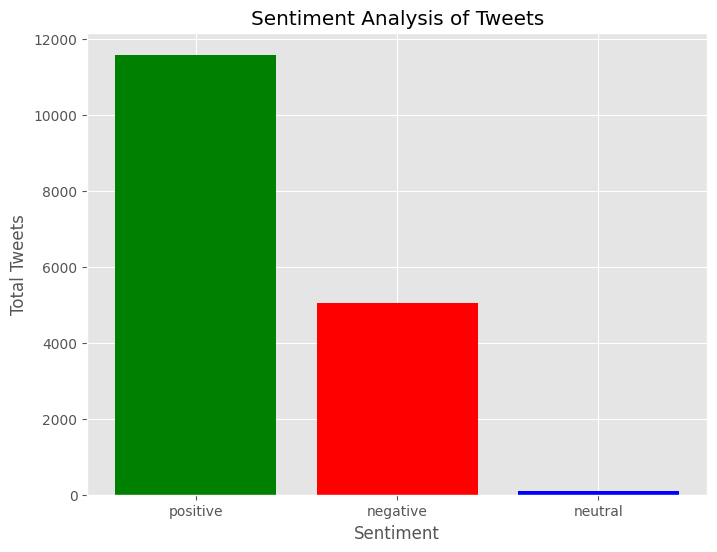

In [92]:
sentiments = sent_df_bert['Sentiment']
total_tweets = sent_df_bert['Total Tweets']

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiments, total_tweets, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Total Tweets')
plt.title('Sentiment Analysis of Tweets')
plt.show()

### 5. Roberta Sentiment Analysis Model

RoBERTa, short for “Robustly Optimized BERT Pretraining Approach”, is a variant of the BERT (Bidirectional Encoder Representations from Transformers) model, developed by researchers at Facebook AI.

Model Type: RoBERTa is a transformer-based language model that uses self-attention to process input sequences and generate contextualized representations of words in a sentence.

Training: RoBERTa was trained on a dataset of 160GB of text, which is more than 10 times larger than the dataset used to train BERT.
Modifications to BERT: RoBERTa has almost similar architecture as compared to BERT, but in order to improve the results on BERT architecture, the authors made some simple design changes in its architecture and training procedure.

Performance: RoBERTa has been shown to outperform BERT and other state-of-the-art models on a variety of natural language processing tasks, including language translation, text classification.

Usage: RoBERTa is a powerful and effective language model that has made significant contributions to the field of NLP and has helped to drive progress in a wide range of applications like sentiment analysis.

In [93]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Load the pre-trained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Function to calculate sentiment score
def get_sentiment_score(text):
    # Tokenize the text
    inputs = tokenizer.encode_plus(text, return_tensors='pt')
    # Get model outputs
    outputs = model(**inputs)
    # Get the probabilities by applying the softmax function
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    # Get the sentiment score
    sentiment_score = probs[0][1] - probs[0][0]
    return sentiment_score.item()


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [94]:
# Calculate sentiment scores
tweets_df['sentiment_scores_roberta'] = tweets_df['Processed_Tweets'].apply(get_sentiment_score)


In [95]:
# Assign sentiment labels based on score
def assign_label(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

tweets_df['sentiment_label_roberta'] = tweets_df['sentiment_scores_roberta'].apply(assign_label)

In [96]:
sent_df_roberta = tweets_df['sentiment_label_roberta'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

In [97]:
sent_df_roberta

,Sentiment,Total Tweets
0,positive,15673
1,negative,550
2,neutral,503


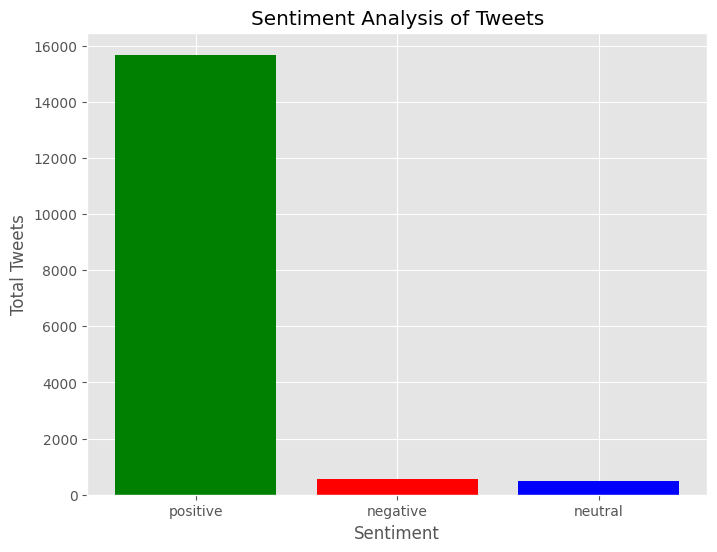

In [98]:
sentiments = sent_df_roberta['Sentiment']
total_tweets = sent_df_roberta['Total Tweets']

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiments, total_tweets, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Total Tweets')
plt.title('Sentiment Analysis of Tweets')
plt.show()

### Comparison of the results

In [99]:
# Calculate sentiment label counts for each model
vader_counts = tweets_df['sentiment_label_vader'].value_counts(normalize=True)*100
textblob_counts = tweets_df['sentiment_label_textblob'].value_counts(normalize=True)*100
pattern_counts = tweets_df['sentiment_label_pattern'].value_counts(normalize=True)*100
bert_counts = tweets_df['sentiment_label_bert'].value_counts(normalize=True)*100
roberta_counts = tweets_df['sentiment_label_roberta'].value_counts(normalize=True)*100

# Create a new DataFrame
summary_df = pd.DataFrame({
    'Model': ['Vader', 'TextBlob','pattern', 'BERT', 'RoBERTa'],
    'Positive': [vader_counts['positive'], textblob_counts['positive'],pattern_counts['positive'], bert_counts['positive'], roberta_counts['positive']],
    'Neutral': [vader_counts['neutral'], textblob_counts['neutral'],pattern_counts['neutral'], bert_counts['neutral'], roberta_counts['neutral']],
    'Negative': [vader_counts['negative'], textblob_counts['negative'],pattern_counts['negative'], bert_counts['negative'], roberta_counts['negative']]
})

print(summary_df)

      Model   Positive    Neutral   Negative
0     Vader  81.573598  10.199689   8.226713
1  TextBlob  49.730958  38.048547  12.220495
2   pattern  49.730958  38.048547  12.220495
3      BERT  69.251465   0.579935  30.168600
4   RoBERTa  93.704412   3.007294   3.288294


## Final Results

### For unbiased results from Ensemble of pre trained models considering majority voting method to eliminate any training biases.

In [100]:
# Create a DataFrame with the sentiment labels from each model
labels_df = tweets_df[['sentiment_label_vader', 'sentiment_label_textblob', 'sentiment_label_bert', 'sentiment_label_roberta', 'sentiment_label_pattern']]

# Function to determine the majority label
def get_majority_label(row):
    return row.mode()[0]

# Apply the function to each row
tweets_df['sentiment_label_ensemble'] = labels_df.apply(get_majority_label, axis=1)


In [102]:
sentiment_proportions=tweets_df['sentiment_label_ensemble'].value_counts(normalize=True)*100

In [103]:
sentiment_proportions

sentiment_label_ensemble
positive    75.869903
neutral     13.846706
negative    10.283391
Name: proportion, dtype: float64

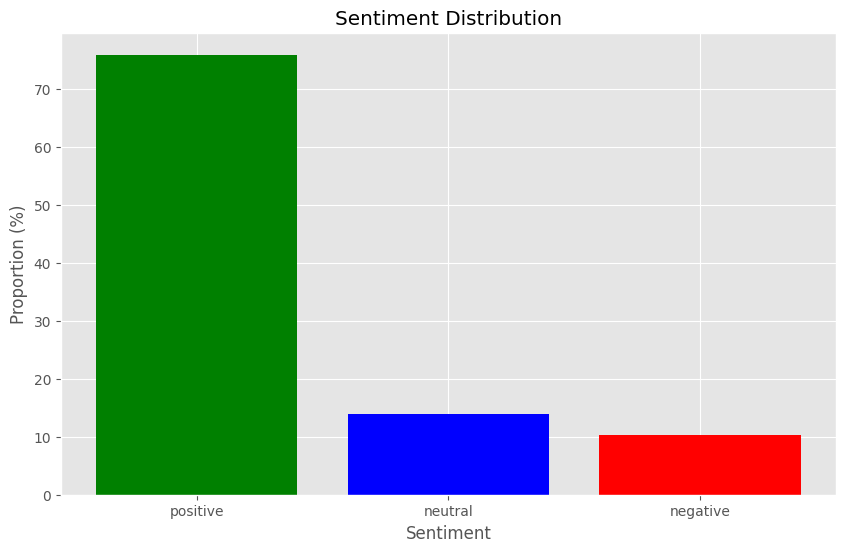

In [104]:
# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(sentiment_proportions.index, sentiment_proportions.values, color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Proportion (%)')
plt.title('Sentiment Distribution')
plt.show()

## Final Summary and Insights

From Data collection and cleaning to model building and analysis, it has been a great learning experience. The following are the concise summary of the same.

**Data Collection**: The dataset consists of tweets related to the clean energy transition. This data was sourced from Kaggle, a popular platform for machine learning and data science projects.

**Data Preprocessing**: The raw tweets were preprocessed to make them suitable for analysis. This involved cleaning the tweets to remove URLs, user mentions, numbers, and stopwords. This step is crucial as it removes unnecessary noise from the data and helps in extracting meaningful insights.

**Sentiment Analysis Models**: An ensemble of pre-trained models was used for sentiment classification. This ensemble included VADER, TextBlob, BERT, RoBERTa, and Pattern. Each of these models has its own strengths and weaknesses, and using them in combination helps in achieving more robust and reliable results.

**Majority Voting**: The final sentiment labels were determined by majority voting across the models. This means that for each tweet, the sentiment label that was predicted by the majority of the models was chosen as the final label. This approach helps in mitigating the biases of individual models and ensures more unbiased results.

**Results**: The sentiment analysis revealed that a significant proportion, 75.86% of the tweets had a positive sentiment towards the clean energy transition. This indicates a generally positive public perception of the clean energy transition, as reflected in the analyzed tweets.

**Visualization**: The results were visualized using various plots and charts, providing a clear and concise summary of the sentiment analysis results.